In [2]:
pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.2 kB 245.8 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.2 kB 245.8 kB/s eta 0:00:02
   ----------- --------------------------- 92.2/301.2 kB 403.5 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/301.2 kB 655.1 kB/s eta 0:00:01
   -------------------------------------  297.0/301.2 kB 874.1 kB/s eta 0:00:01
   -------------------------------------- 301.2/301.2 kB 848.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import Libraries & Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import plotly.express as px

# Set visualization style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams['figure.figsize'] = (10, 6)

# Load your dataset
df = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\Desktop\Flipkart_scapping\Flipkart_mobile_recommendation.csv")

print("✅ Data Loaded Successfully")
print(df.head())


✅ Data Loaded Successfully
                          Product_Name  Product_ID Sentiment  Sentiment_Score  \
0     Honor Holly (Black/White, 16 GB)         123  Positive         0.896708   
1             Honor 6X (Silver, 64 GB)         145  Positive         0.886284   
2               Honor 6X (Grey, 64 GB)         133  Positive         0.886284   
3  Google Pixel 7 (Lemongrass, 128 GB)         148  Positive         0.845856   
4        Google Pixel 7 (Snow, 128 GB)         152  Positive         0.845856   

   Ratings  Reviews  
0     4.23       50  
1     4.49       50  
2     4.49       50  
3     4.71       50  
4     4.71       50  


In [4]:
# Dataset Overview
print("🔹 Shape of dataset:", df.shape)
print("\n🔹 Column names:", list(df.columns))
print("\n🔹 Missing Values:\n", df.isnull().sum())
print("\n🔹 Data Types:\n", df.dtypes)


🔹 Shape of dataset: (188, 6)

🔹 Column names: ['Product_Name', 'Product_ID', 'Sentiment', 'Sentiment_Score', 'Ratings', 'Reviews']

🔹 Missing Values:
 Product_Name       0
Product_ID         0
Sentiment          0
Sentiment_Score    0
Ratings            0
Reviews            0
dtype: int64

🔹 Data Types:
 Product_Name        object
Product_ID           int64
Sentiment           object
Sentiment_Score    float64
Ratings            float64
Reviews              int64
dtype: object


C:\Users\HP\AppData\Local\Temp\ipykernel_11812\3888380589.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ratings', data=df, palette='coolwarm', order=sorted(df['Ratings'].unique()))


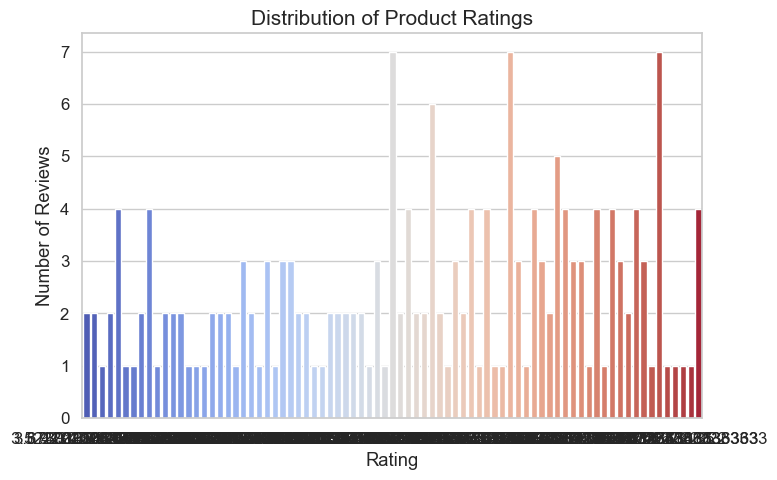

In [7]:
# Rating Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Ratings', data=df, palette='coolwarm', order=sorted(df['Ratings'].unique()))
plt.title('Distribution of Product Ratings', fontsize=15)
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()


In [ ]:
# Sentiment Pie Chart
if 'Sentiment' in df.columns:
    fig = px.pie(df, names='Sentiment', title='Sentiment Proportion (Interactive)',
                 color_discrete_sequence=px.colors.qualitative.Pastel)
    fig.show()


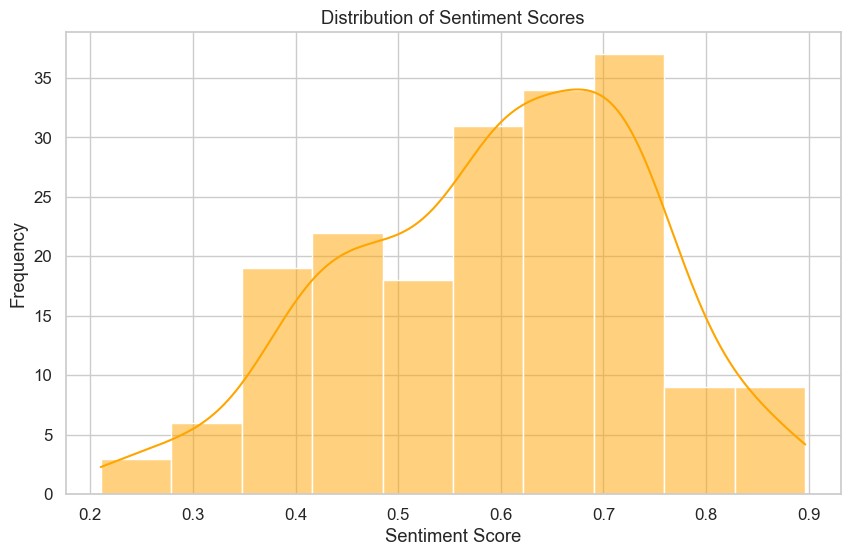

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment_Score'], bins=10, kde=True, color='orange')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11812\2851433418.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




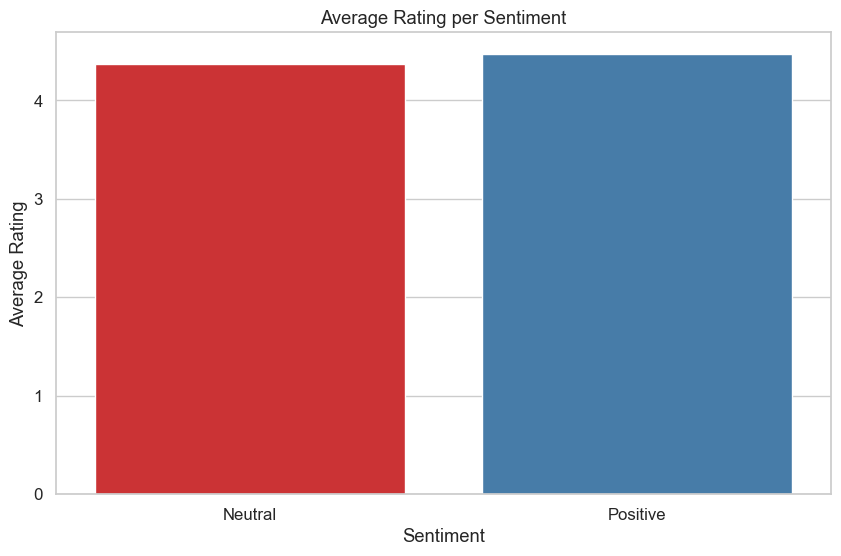

In [20]:
plt.figure(figsize=(10, 6))
average_rating_sentiment = df.groupby('Sentiment')['Ratings'].mean().reset_index()
sns.barplot(x='Sentiment', y='Ratings', data=average_rating_sentiment, palette='Set1')
plt.title('Average Rating per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating')
plt.show()

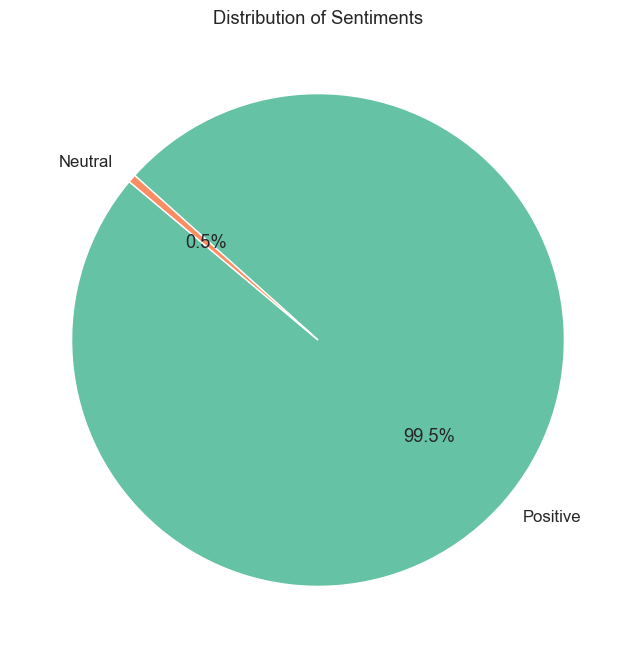

In [21]:
# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Distribution of Sentiments')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11812\3928530870.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.



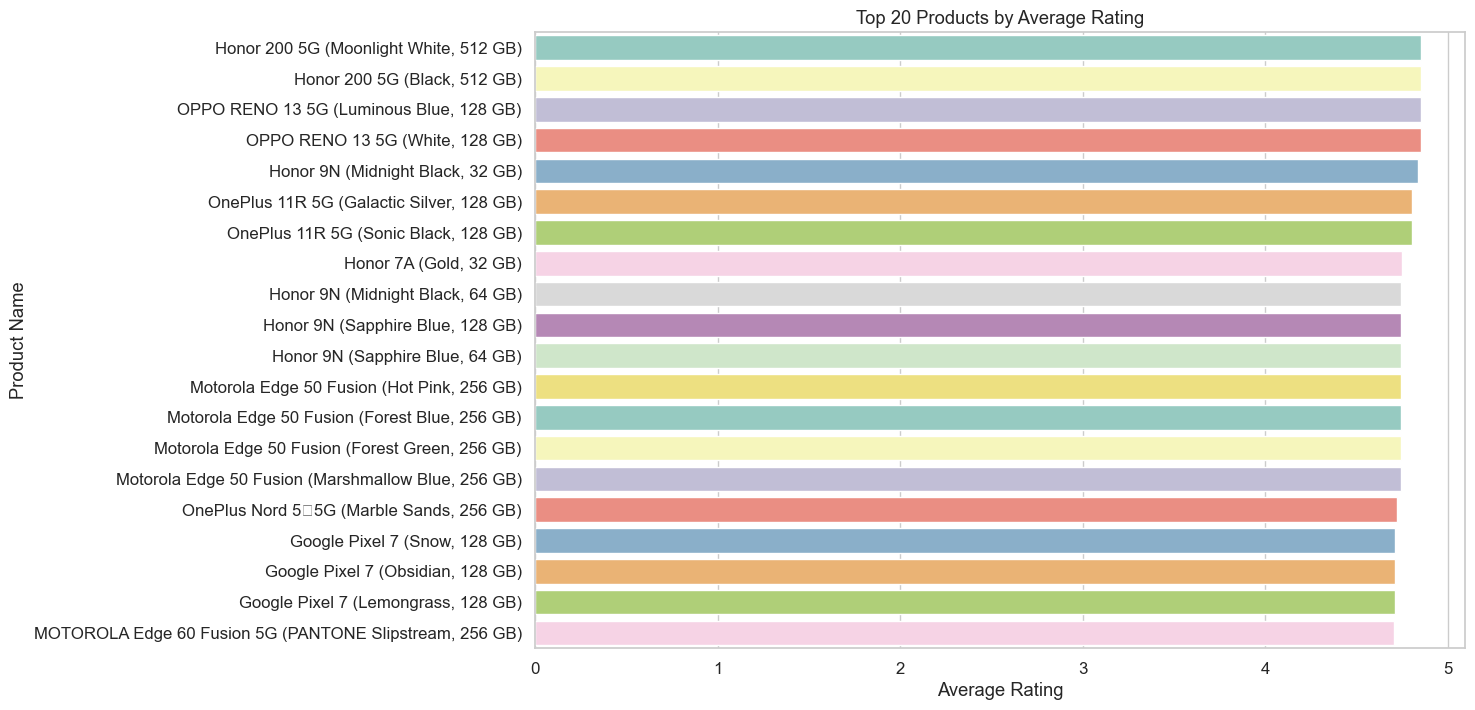

In [22]:
plt.figure(figsize=(12, 8))
product_avg_rating = df.groupby('Product_Name')['Ratings'].mean().sort_values(ascending=False).head(20).reset_index()
sns.barplot(x='Ratings', y='Product_Name', data=product_avg_rating, palette='Set3')
plt.title('Top 20 Products by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11812\2951361937.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




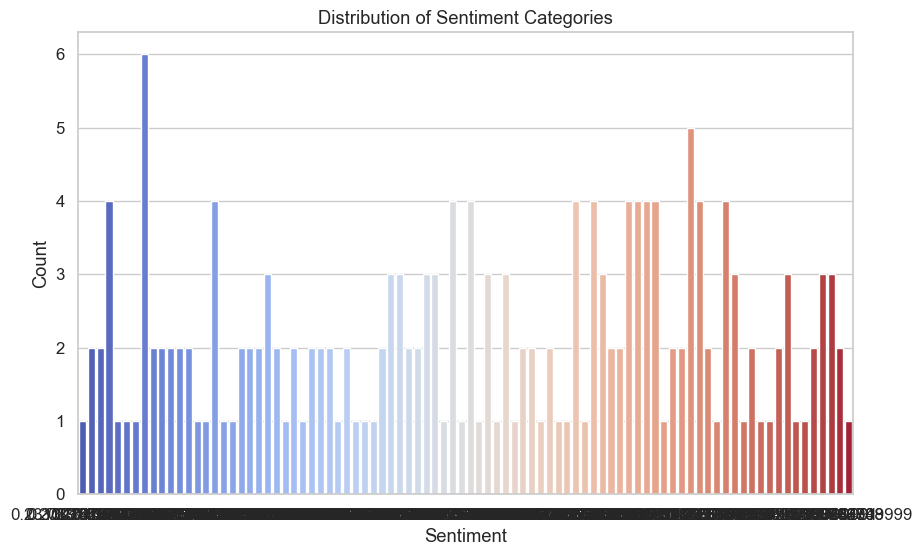

In [23]:
# Count the number of each sentiment category
sentiment_counts = df['Sentiment_Score'].value_counts()

# Plot the distribution of sentiment categories
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11812\2986721436.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




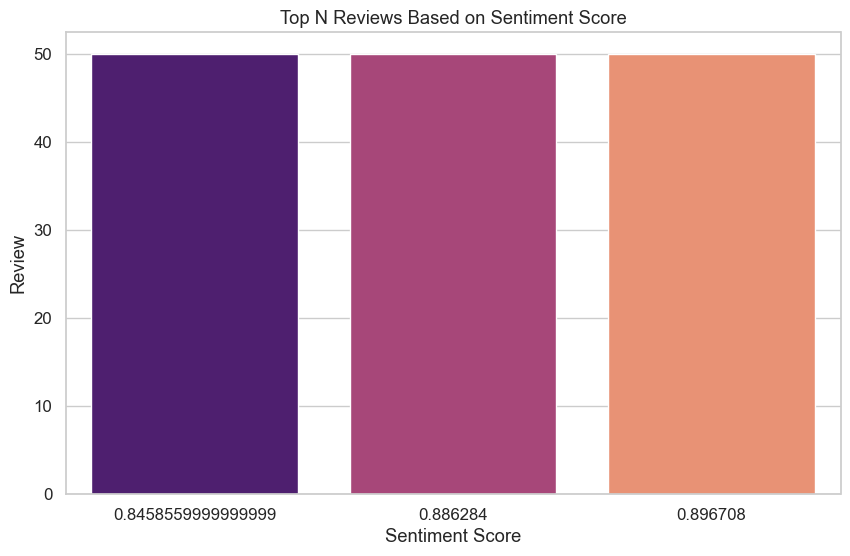

In [24]:
top_n = 5  # Change this to the number of top reviews you want to see
top_reviews = df.nlargest(top_n, 'Sentiment_Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_reviews, x='Sentiment_Score', y='Reviews', palette='magma')
plt.title('Top N Reviews Based on Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Review')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11812\1652465262.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




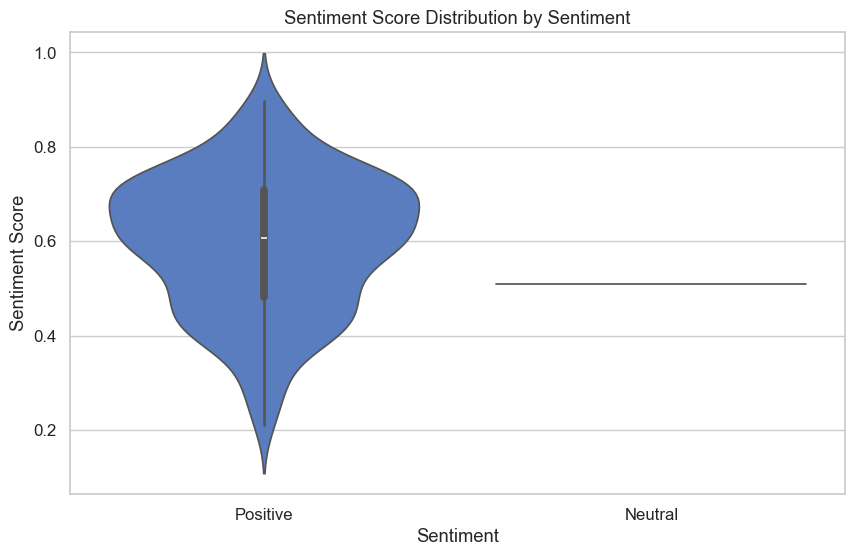

In [25]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Sentiment', y='Sentiment_Score', palette='muted')
plt.title('Sentiment Score Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Score')
plt.show()

In [26]:
df1=pd.read_csv(r"C:\Users\HP\OneDrive\Documents\Desktop\Flipkart_scapping\Flipkart_Products_reviews_with_sentiment.csv")

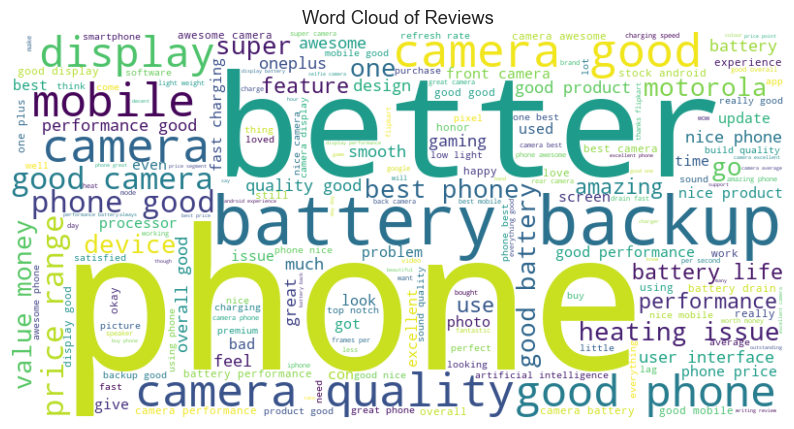

In [27]:
from wordcloud import WordCloud

# Ensure all reviews are converted to strings
df1['Reviews'] = df1['Reviews'].astype(str)

# Filter out empty strings
non_empty_reviews = df1['Reviews'].loc[df1['Reviews'].str.strip() != '']

# Combine all non-empty reviews into a single string
text = " ".join(review for review in non_empty_reviews)

if text.strip():  # Check if there's any non-empty text to generate the word cloud
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Reviews')
    plt.show()
else:
    print("No valid text data available to generate a word cloud.")

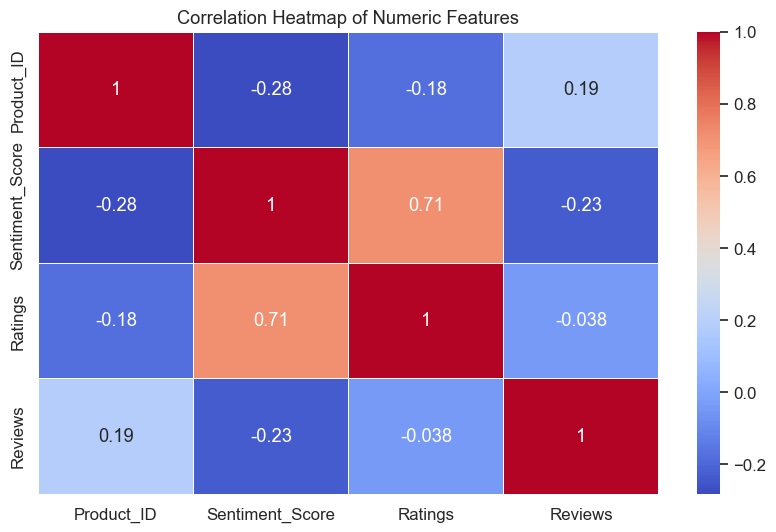

In [28]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

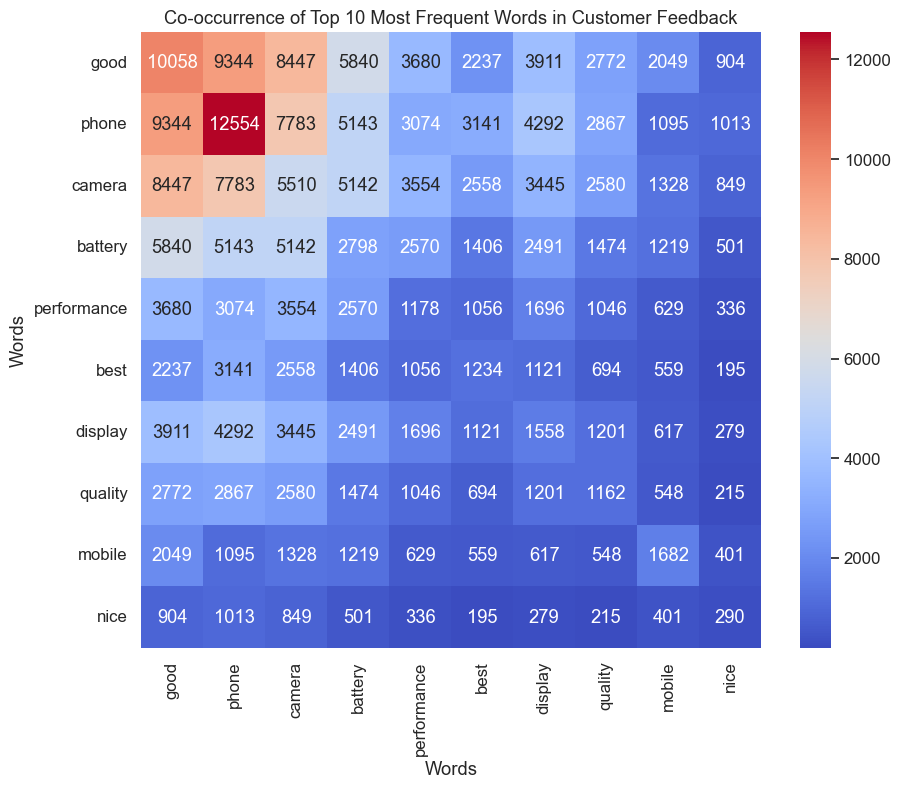

In [30]:
import pandas as pd
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\Desktop\Flipkart_scapping\Flipkart_Products_reviews_with_sentiment.csv")

# Combine all cleaned reviews into one string
all_reviews = ' '.join(df['Reviews'].astype(str))

# Get the top 10 most frequent words
word_counts = Counter(all_reviews.split())
common_words = [word for word, _ in word_counts.most_common(10)]

# Initialize the co-occurrence matrix
co_occurrence_matrix = np.zeros((10, 10))

# Create a dictionary to map words to indices
word_to_index = {word: i for i, word in enumerate(common_words)}

# Fill the co-occurrence matrix
for review in df['Reviews']:
    words = review.split()
    for i, word in enumerate(words):
        if word in common_words:
            for j in range(i + 1, len(words)):
                if words[j] in common_words:
                    word_i, word_j = word_to_index[word], word_to_index[words[j]]
                    co_occurrence_matrix[word_i][word_j] += 1
                    co_occurrence_matrix[word_j][word_i] += 1  # Since it's symmetric

# Plot the co-occurrence matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, xticklabels=common_words, yticklabels=common_words, cmap='coolwarm', annot=True, fmt='g')
plt.title('Co-occurrence of Top 10 Most Frequent Words in Customer Feedback')
plt.xlabel('Words')
plt.ylabel('Words')
plt.show()

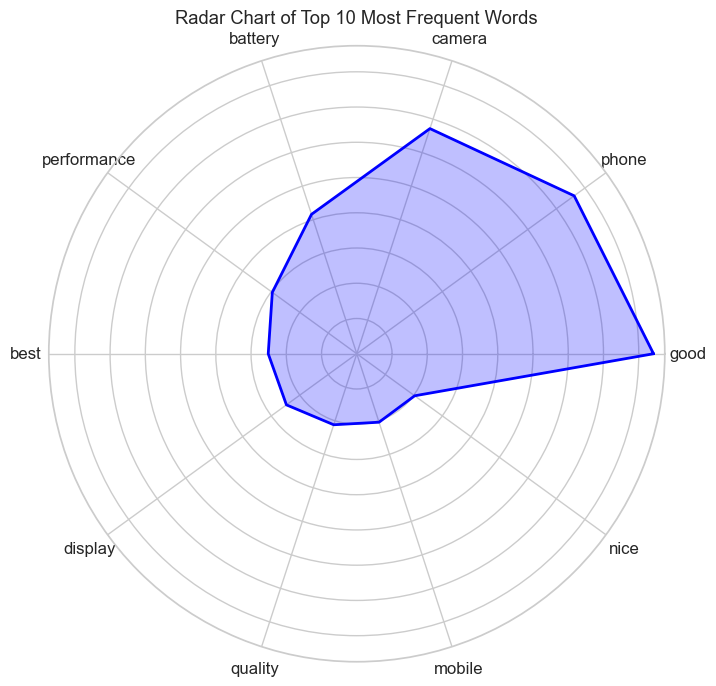

In [31]:
import pandas as pd
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\Desktop\Flipkart_scapping\Flipkart_Products_reviews_with_sentiment.csv")

# Combine all cleaned reviews into one string
all_reviews = ' '.join(df['Reviews'].astype(str))

# Get the top 10 most frequent words
word_counts = Counter(all_reviews.split())
common_words = [word for word, _ in word_counts.most_common(10)]
frequencies = [word_counts[word] for word in common_words]

# Function to create radar chart
def create_radar_chart(categories, values):
    num_vars = len(categories)

    # Compute angle for each category
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is a circle, so we need to "complete the loop" and append the start value to the end.
    values = values + values[:1]
    angles += angles[:1]

    # Create the radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)

    # Labels for each category
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    plt.title('Radar Chart of Top 10 Most Frequent Words')
    plt.show()

# Call the function to create the radar chart
create_radar_chart(common_words, frequencies)